<a href="https://colab.research.google.com/github/Riyaaa1/malaria-detection/blob/main/malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip -q "/content/drive/MyDrive/kaggle-dataset/cell-images.zip"

replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Importing necessary libraries

In [3]:
# importing the necessary libraries

import os
import shutil
import random 
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

import cv2

#Checking the data

In [4]:
IMAGE_PATH = "/content/cell_images/cell_images"

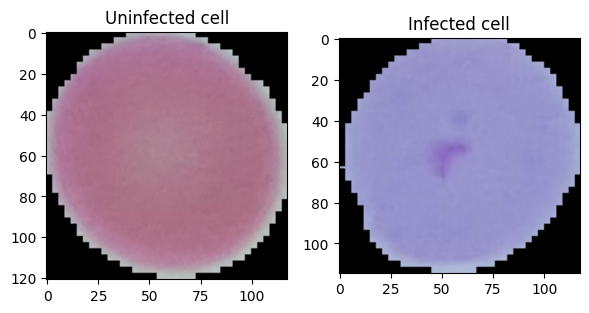

In [5]:
infected_dir = os.path.join(IMAGE_PATH, "Parasitized")
uninfected_dir = os.path.join(IMAGE_PATH, "Uninfected")

random.seed(42)

inf_list = []
uninf_list = []
for filename in os.listdir(infected_dir):

    file_path = os.path.join(infected_dir, filename)
    inf_list.append(file_path)

for filename in os.listdir(uninfected_dir):

    file_path = os.path.join(uninfected_dir, filename)
    uninf_list.append(file_path)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (6,8))



# Chooses a random uninfected cell image and plot it in the first subplot
i1 = random.randint(0, len(uninf_list))
axes[0].imshow(cv2.imread(uninf_list[i1]))
axes[0].set_title("Uninfected cell")

# Chooses a random infected cell image and plot it in the second subplot
i2 = random.randint(0, len(inf_list))
axes[1].imshow(cv2.imread(inf_list[i2]))
axes[1].set_title("Infected cell")



fig.tight_layout()

plt.show()

#Data Preparation

In [6]:
'''
# creating testdataset from exisiting dataset
test_dir = "/content/drive/MyDrive/test-set"
os.makedirs(test_dir, exist_ok=True)

classes = ['Parasitized', 'Uninfected']

for cls in classes:
    cls_dir = os.path.join(test_dir, cls)
    os.makedirs(cls_dir, exist_ok=True)

# percentage of data to use for the test set
test_set_size = 0.1

for cls in classes:
    cls_dir_path = os.path.join(IMAGE_PATH, cls)
    cls_img_paths = [os.path.join(cls_dir_path, filename) for filename in os.listdir(cls_dir_path)]
 # shuffle the image paths 
    random.seed(42)
    random.shuffle(cls_img_paths)
    num_test_images = int(len(cls_img_paths) * test_set_size)
    test_set_paths = cls_img_paths[:num_test_images]
    for image_path in test_set_paths:
        filename = os.path.basename(image_path)
        dest_path = os.path.join(test_dir, cls, filename)
        shutil.move(image_path, dest_path)
'''

'\n# creating testdataset from exisiting dataset\ntest_dir = "/content/drive/MyDrive/test-set"\nos.makedirs(test_dir, exist_ok=True)\n\nclasses = [\'Parasitized\', \'Uninfected\']\n\nfor cls in classes:\n    cls_dir = os.path.join(test_dir, cls)\n    os.makedirs(cls_dir, exist_ok=True)\n\n# percentage of data to use for the test set\ntest_set_size = 0.1\n\nfor cls in classes:\n    cls_dir_path = os.path.join(IMAGE_PATH, cls)\n    cls_img_paths = [os.path.join(cls_dir_path, filename) for filename in os.listdir(cls_dir_path)]\n # shuffle the image paths \n    random.seed(42)\n    random.shuffle(cls_img_paths)\n    num_test_images = int(len(cls_img_paths) * test_set_size)\n    test_set_paths = cls_img_paths[:num_test_images]\n    for image_path in test_set_paths:\n        filename = os.path.basename(image_path)\n        dest_path = os.path.join(test_dir, cls, filename)\n        shutil.move(image_path, dest_path)\n'

In [7]:
data_generator = ImageDataGenerator(rescale=1/255., validation_split = 0.2)

In [8]:

train_generator = data_generator.flow_from_directory(directory=IMAGE_PATH,
                                           target_size=(128,128),
                                           class_mode = 'binary',
                                           batch_size = 32,
                                           subset='training')

val_generator = data_generator.flow_from_directory(directory=IMAGE_PATH,
                                           target_size=(128,128),
                                           class_mode = 'binary',
                                           batch_size = 32,
                                           subset='validation')


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


#building the model

In [26]:
# model 1 represents
model1 = Sequential()
model1.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPool2D(pool_size=(2, 2)))

model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision()])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [42]:
# model 2

model2 = Sequential()

model2.add(Conv2D(filters = 8,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.3))

model2.add(Flatten())

model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision()])

model2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 63, 8)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 8)         0         
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 30, 30, 16)       

In [11]:
early_stop = EarlyStopping(monitor="val_loss", patience = 4)

In [27]:
history1 = model1.fit_generator(generator = train_generator,
                    steps_per_epoch = len(train_generator),
                    epochs = 10,
                    validation_data = val_generator,
                    validation_steps = len(val_generator),
                    callbacks=[early_stop]
                    )

Epoch 1/10


<ipython-input-27-78e1f304cb3e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model1.fit_generator(generator = train_generator,


689/689 [==============================] - 44s 61ms/step - loss: 0.6463 - accuracy: 0.6288 - precision_2: 0.6358 - val_loss: 0.5866 - val_accuracy: 0.6936 - val_precision_2: 0.7244
Epoch 2/10
689/689 [==============================] - 42s 61ms/step - loss: 0.3498 - accuracy: 0.8647 - precision_2: 0.8461 - val_loss: 0.2902 - val_accuracy: 0.9152 - val_precision_2: 0.9040
Epoch 3/10
689/689 [==============================] - 42s 61ms/step - loss: 0.1839 - accuracy: 0.9380 - precision_2: 0.9237 - val_loss: 0.2069 - val_accuracy: 0.9319 - val_precision_2: 0.9247
Epoch 4/10
689/689 [==============================] - 42s 61ms/step - loss: 0.1315 - accuracy: 0.9560 - precision_2: 0.9460 - val_loss: 0.2046 - val_accuracy: 0.9279 - val_precision_2: 0.9035
Epoch 5/10
689/689 [==============================] - 41s 60ms/step - loss: 0.0855 - accuracy: 0.9711 - precision_2: 0.9667 - val_loss: 0.2238 - val_accuracy: 0.9243 - val_precision_2: 0.9217
Epoch 6/10
689/689 [==============================]

In [43]:
history2 = model2.fit_generator(generator = train_generator,
                    steps_per_epoch = len(train_generator),
                    epochs = 10,
                    validation_data = val_generator,
                    validation_steps = len(val_generator),
                    callbacks=[early_stop]
                    )

Epoch 1/10


<ipython-input-43-f015bcf76c0f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(generator = train_generator,


689/689 [==============================] - 97s 61ms/step - loss: 0.6809 - accuracy: 0.5670 - precision_4: 0.5717 - val_loss: 0.6872 - val_accuracy: 0.5534 - val_precision_4: 0.5507
Epoch 2/10
689/689 [==============================] - 42s 61ms/step - loss: 0.6510 - accuracy: 0.6224 - precision_4: 0.6568 - val_loss: 0.6544 - val_accuracy: 0.6074 - val_precision_4: 0.5924
Epoch 3/10
689/689 [==============================] - 54s 79ms/step - loss: 0.3935 - accuracy: 0.8447 - precision_4: 0.8359 - val_loss: 0.2217 - val_accuracy: 0.9260 - val_precision_4: 0.8985
Epoch 4/10
689/689 [==============================] - 44s 63ms/step - loss: 0.1914 - accuracy: 0.9369 - precision_4: 0.9329 - val_loss: 0.1717 - val_accuracy: 0.9397 - val_precision_4: 0.9410
Epoch 5/10
689/689 [==============================] - 44s 65ms/step - loss: 0.1687 - accuracy: 0.9468 - precision_4: 0.9402 - val_loss: 0.1555 - val_accuracy: 0.9463 - val_precision_4: 0.9334
Epoch 6/10
689/689 [==============================]

# Visualising the model performance


In [15]:
def plot_training_validation_accuracy(epochs, train_acc, val_acc, model_name):
    epochRange = range(1,epochs+1)
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(epochRange, train_acc,color = "green", label ='Training accuracy')
    ax.plot(epochRange, val_acc, color = "orange", label = "Validation accuracy")
    ax.set_title(f"Accuracy for {model_name}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Accuracy")
    ax.legend()
    plt.show()


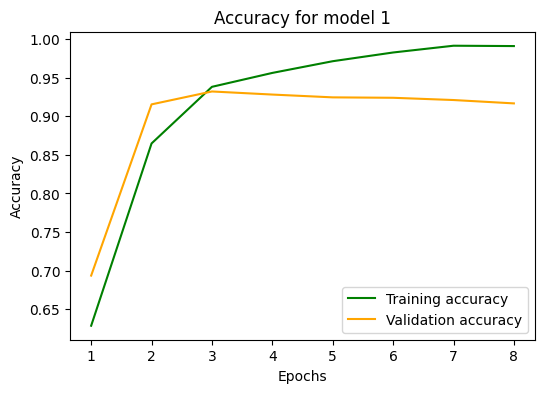

In [30]:
# accuracy plot for the first model
train_acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

plot_training_validation_accuracy(8,train_acc1,val_acc1, "model 1")

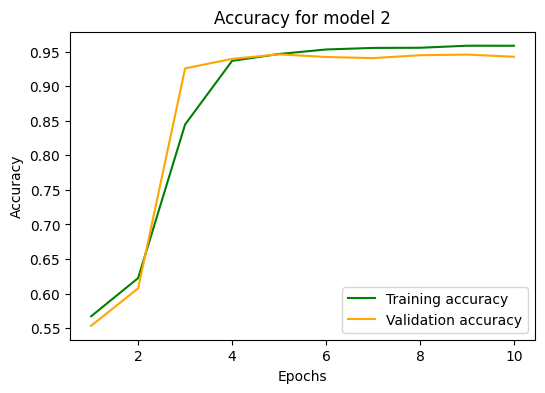

In [45]:
# accuracy plot for the second model
train_acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

plot_training_validation_accuracy(10,train_acc2,val_acc2, "model 2")

In [32]:
def plot_training_validation_loss(epochs, train_acc, val_acc, model_name):
    epochRange = range(1,epochs+1)
    fig, axes = plt.subplots(figsize=(6, 5))
    axes.plot(epochRange, train_acc, color="green", label ='Training ')
    axes.plot(epochRange, val_acc, color = "orange", label = "Validation")
    axes.set_title(f"Loss for {model_name}")
    axes.set_xlabel("Epochs")
    axes.set_ylabel("Loss")
    axes.legend()
    plt.show()

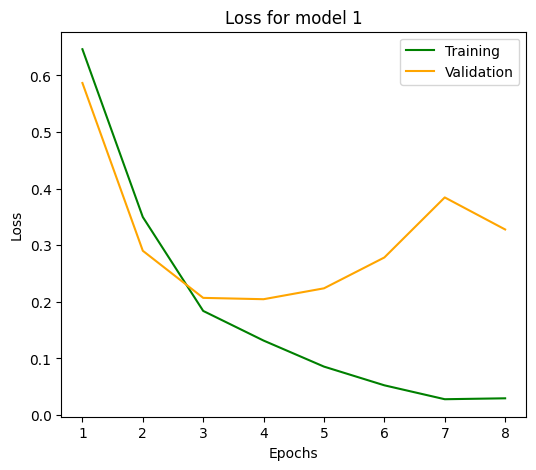

In [46]:
train_loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plot_training_validation_loss(8,train_loss1,val_loss1, "model 1")

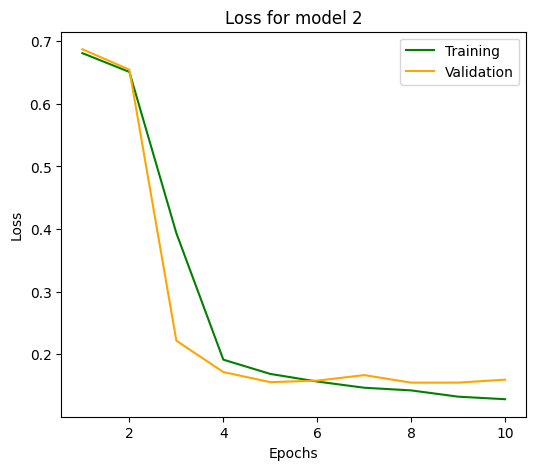

In [47]:

train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plot_training_validation_loss(10,train_loss2,val_loss2, "model 2")

In [49]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/test-set',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle = False)

Found 2748 images belonging to 2 classes.


In [56]:
test_data = test_generator[0][0]
test_labels = test_generator[0][1]

In [59]:
# Define the metrics to evaluate the model
metrics = ['accuracy', tf.keras.metrics.Precision()]

# Evaluate model1 on the test set
results1 = model1.evaluate(test_data, test_labels, verbose=0)
accuracy1, precision1 = results1[1], results1[2]

# Evaluate model2 on the test set
results2 = model2.evaluate(test_data, test_labels, verbose=0)
accuracy2, precision2 = results2[1], results2[2]

# Print the results
print("Model 1 - Accuracy: {:.2f}%, Precision: {:.3f}%".format(accuracy1*100, precision1*100))
print("Model 2 - Accuracy: {:.2f}%, Precision: {:.3f}%".format(accuracy2*100, precision2*100))


Model 1 - Accuracy: 93.75%, Precision: 0.000%
Model 2 - Accuracy: 87.50%, Precision: 0.000%


# Making predictions


In [64]:
test_dir = "/content/drive/MyDrive/test-set"

In [80]:
inf_dir = os.path.join(test_dir, "Parasitized")
uninf_dir = os.path.join(test_dir, "Uninfected")

inf_paths = [os.path.join(inf_dir, filename) for filename in os.listdir(inf_dir)]
uninf_paths = [os.path.join(uninf_dir, filename) for filename in os.listdir(uninf_dir)]

# creating a list with paths to all the infected and uninfected cell images in test set
test_paths = inf_paths + uninf_paths 
i1 = random.randint(0, len(test_paths)) # randomly choose one image from this list
image_path = test_paths[i1]
# defining the function that takes model and an image path as an arguments and returns the predictions with respective labels

def make_predictions(model, img_path):
    test_image = cv2.imread(img_path)
    img = cv2.resize(test_image, (128, 128))
    
    # Make prediction
    y_pred = model.predict(img.reshape(1,128,128,3))
    if y_pred > 0.5:
        pred = "Uninfected"
    else:
        pred = "Infected"
    
    # Get true label
    if "Uninfected" in img_path:
        true_label = "Uninfected"
    else:
        true_label = "Infected"
    
    # Set color for predicted label
    if pred == true_label:
        color = "green"
    else:
        color = "red"
    
    # Display image with predicted and true labels
    plt.imshow(img)
    plt.title(f"Predicted: {pred}", color=color)
    plt.xlabel(f"True Label: {true_label}")
    plt.show()
    


1/1 [==============================] - 0s 20ms/step


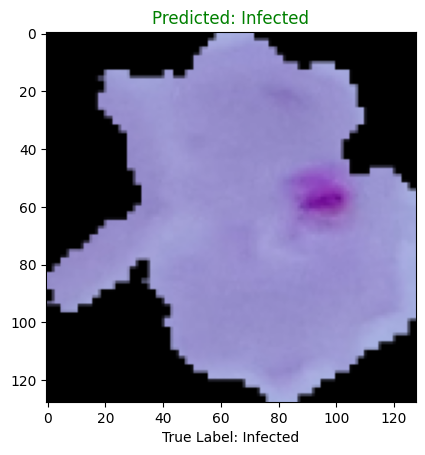

In [81]:
make_predictions(model1, image_path)

1/1 [==============================] - 0s 22ms/step


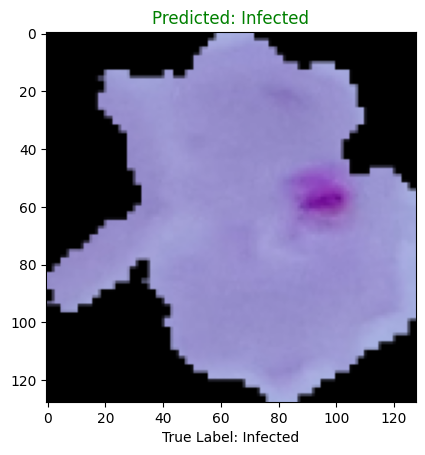

In [82]:
make_predictions(model2, image_path)


In [83]:

from tensorflow.keras.models import save_model

save_model(model1,"model1.h5")
save_model(model2,"model2.h5")

#Creating activation maps


In [106]:
# loading the model
my_model = load_model("/content/model2.h5")

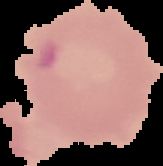

In [108]:
# The local path to our target image
image_path = "/content/drive/MyDrive/test-set/Parasitized/C100P61ThinF_IMG_20150918_145938_cell_173.png"

display(Image(image_path))

In [112]:
def generate_cam(model, img_path, img_size, class_index):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_size, img_size))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    
    # Get the feature maps and predictions
    feature_maps, predictions = model.predict(img)
    predictions = predictions[0]
    
    # Get the weights of the last convolutional layer
    last_conv_layer = model.get_layer(index=-3)
    last_conv_layer_weights = last_conv_layer.get_weights()[0]
    
    # Compute the class activation map
    feature_maps = np.reshape(feature_maps, (1, -1))
    cam = np.dot(feature_maps, last_conv_layer_weights)
    cam = np.reshape(cam, (8, 8))
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    
    # Plot the original image and the class activation map
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.imshow(cam, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.title(f'Class Activation Map for Class {class_index} ({predictions[class_index]:.2f})')
    
    plt.show()